Handling outliers is an important step in data preprocessing. Various methods can be used to address outliers, depending on the context and goals of the analysis. Here are some common methods for handling outliers:

In [125]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

df = pd.read_csv('E:/learning/UT DataScience/Python for Data Science/Session 1/Heart data.csv')
df

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52.0,1.0,4.0,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1.0
593,43.0,1.0,4.0,140.0,288.0,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1.0
594,41.0,1.0,4.0,120.0,336.0,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1.0
595,44.0,1.0,4.0,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1.0


In [126]:
feature = df.columns
feature

Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')

#### 1. Removal of Outliers:

1-1 Manual Removal: Identify and remove outliers manually based on domain knowledge or visual inspection.

In [127]:
# Manual removal based on domain knowledge or visual inspection
df_manual_removed = df[df['cholestoral '] < 100]

print("Manual Removal:\n", df_manual_removed)

Manual Removal:
      Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
227               56.0  1.0         4.0           120.0          85.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
227          0.0                    0.0       140.0               0.0   

     depression   slope  ca  thal    c  
227          0.0    NaN NaN   NaN  0.0  


1-2 Statistical Removal: Remove outliers based on statistical methods such as Z-scores, IQR (Interquartile Range), etc.

1-2-1 Statistical Removal Using Z-scores

Original Data:
 (597, 14)
Removal using Z-scores:
 (590, 14)


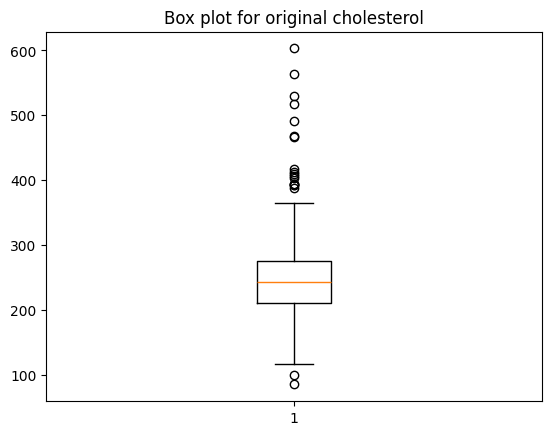

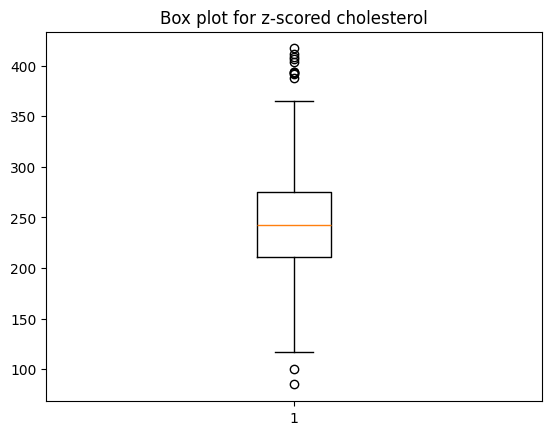

In [128]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

df_zscore = df.copy()
df_zscore['cholestoral '] = df_zscore['cholestoral '].fillna(df_zscore['cholestoral '].median())
df_zscore

z_score = np.abs(stats.zscore(df_zscore['cholestoral ']))
threshold = 3
df_zscore_removed = df_zscore[(z_score < threshold)]

print("Original Data:\n", df.shape)
print("Removal using Z-scores:\n", df_zscore_removed.shape)

#box plot for original data
plt.boxplot(df_zscore['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for z-scored data
plt.boxplot(df_zscore_removed['cholestoral '])
plt.title("Box plot for z-scored cholesterol")
plt.show()

1-2-2 Statistical Removal Using IQR method

0
Original Data:
 (597, 14)
Removal using IQR:
 (578, 14)


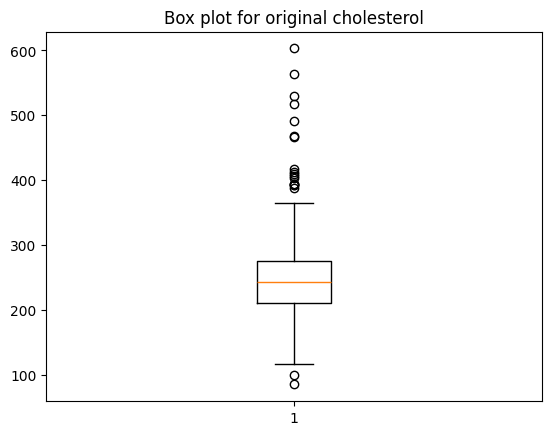

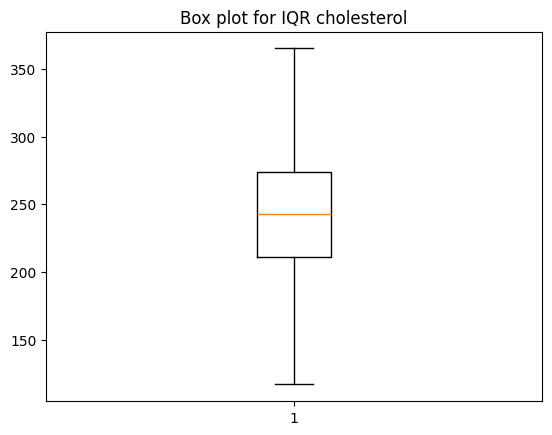

In [129]:
import matplotlib.pyplot as plt

df_IQR = df.copy()
df_IQR['cholestoral '] = df_IQR['cholestoral '].fillna(df_IQR['cholestoral '].median())

Q1 = df_IQR['cholestoral '].quantile(0.25)
Q3 = df_IQR['cholestoral '].quantile(0.75)
IQR = Q3 - Q1
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
removal_outlier = df_IQR[~((df_IQR['cholestoral '] < iqr_lower_bound) | (df_IQR['cholestoral '] > iqr_upper_bound))]

print(removal_outlier['cholestoral '].isnull().sum())
print("Original Data:\n", df.shape)
print("Removal using IQR:\n", removal_outlier.shape)

#box plot for original data
plt.boxplot(df_IQR['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for IQR data
plt.boxplot(removal_outlier['cholestoral '])
plt.title("Box plot for IQR cholesterol")
plt.show()

#### 2. Transformation


2-1 Log Transformation


Log Transformation: Apply logarithmic transformation to reduce the impact of outliers.


Log Transformation:
      Age (age in year)       sex  chest pain  blood pressure  cholestoral   \
0             4.158883  0.693147    0.693147        4.983607      5.455321   
1             3.637586  0.693147    1.386294        4.875197      5.525453   
2             3.737670  0.000000    1.098612        4.875197      5.323010   
3             4.043051  0.693147    1.098612        4.795791      5.468060   
4             4.060443  0.000000    1.609438        4.795791      5.872118   
..                 ...       ...         ...             ...           ...   
592           3.970292  0.693147    1.609438        4.948760      5.587249   
593           3.784190  0.693147    1.609438        4.948760      5.666427   
594           3.737670  0.693147    1.609438        4.795791      5.820083   
595           3.806662  0.693147    1.609438        4.912655      6.198479   
596           3.912023  0.693147    1.609438        5.017280      5.407172   

     blood sugar  electrocardiographic   h

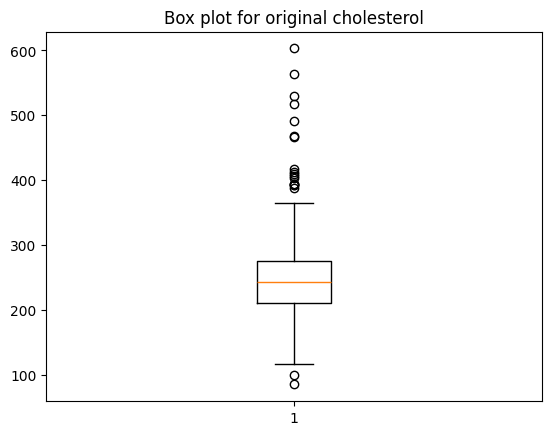

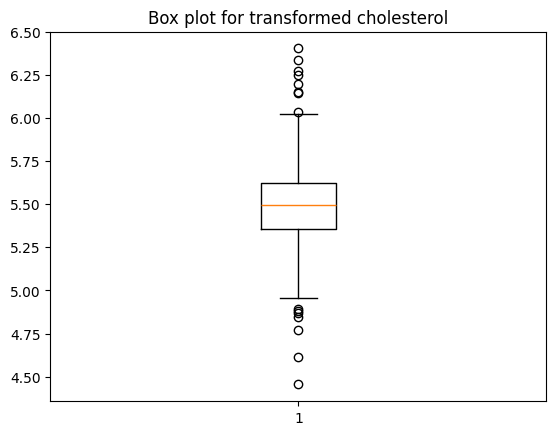

In [130]:
import numpy as np
import matplotlib.pyplot as plt

df_logT = df.copy()
df_logT['cholestoral '] = df_logT['cholestoral '].fillna(df_logT['cholestoral '].median())

df_log_transformed = df_logT.apply(np.log1p)
print("Log Transformation:\n", df_log_transformed)

#box plot for original data
plt.boxplot(df_logT['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for transformed data
plt.boxplot(df_log_transformed['cholestoral '])
plt.title("Box plot for transformed cholesterol")
plt.show()

2-2 Square Root Transformation

Square Root Transformation: Apply square root transformation to stabilize variance and reduce the effect of outliers.


Square Root Transformation:
      Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0             7.937254  1.0    1.000000       12.041595     15.264338   
1             6.082763  1.0    1.732051       11.401754     15.811388   
2             6.403124  0.0    1.414214       11.401754     14.282857   
3             7.483315  1.0    1.414214       10.954451     15.362291   
4             7.549834  0.0    2.000000       10.954451     18.814888   
..                 ...  ...         ...             ...           ...   
592           7.211103  1.0    2.000000       11.832160     16.309506   
593           6.557439  1.0    2.000000       11.832160     16.970563   
594           6.403124  1.0    2.000000       10.954451     18.330303   
595           6.633250  1.0    2.000000       11.618950     22.158520   
596           7.000000  1.0    2.000000       12.247449     14.899664   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0     

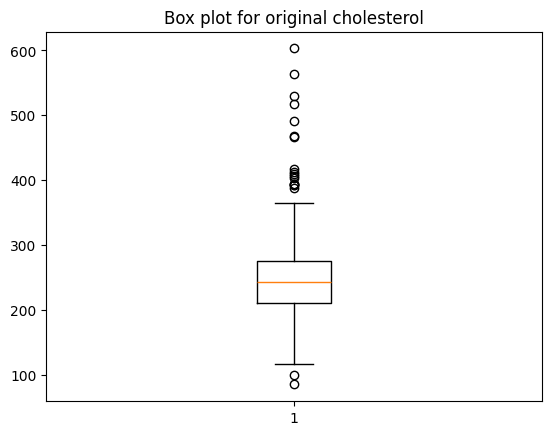

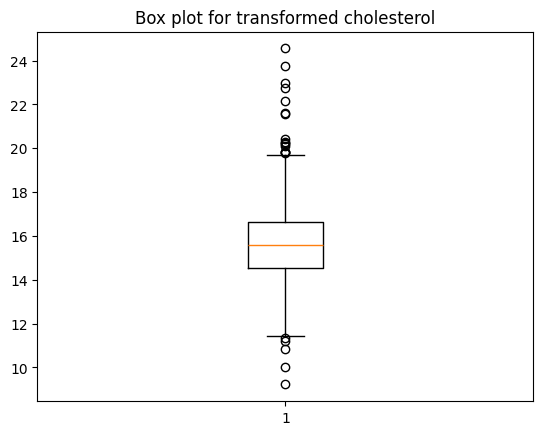

In [131]:
import numpy as np
import matplotlib.pyplot as plt

df_square_root = df.copy()
df_square_root['cholestoral '] = df_square_root['cholestoral '].fillna(df_square_root['cholestoral '].median())

df_sqrt_transformed = df_square_root.apply(np.sqrt)
print("Square Root Transformation:\n", df_sqrt_transformed)

#box plot for original data
plt.boxplot(df_square_root['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for transformed data
plt.boxplot(df_sqrt_transformed['cholestoral '])
plt.title("Box plot for transformed cholesterol")
plt.show()

2-3 Box-Cox Transformation

Box-Cox Transformation: Apply Box-Cox transformation for normalization.


Box-Cox Transformation:
      Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0            78.130783  1.0    1.521914           145.0      5.110716   
1            44.415067  1.0    7.755356           130.0      5.172126   
2            49.522616  0.0    4.101969           130.0      4.994575   
3            68.944184  1.0    4.101969           120.0      5.121879   
4            70.252184  0.0   12.492819           120.0      5.474154   
..                 ...  ...         ...             ...           ...   
592          63.727641  1.0   12.492819           140.0      5.226151   
593          52.088712  1.0   12.492819           140.0      5.295253   
594          49.522616  1.0   12.492819           120.0      5.428980   
595          53.374683  1.0   12.492819           135.0      5.756186   
596          59.832224  1.0   12.492819           150.0      5.068494   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0         

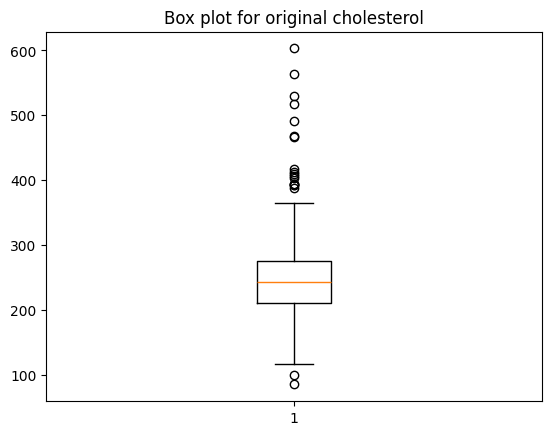

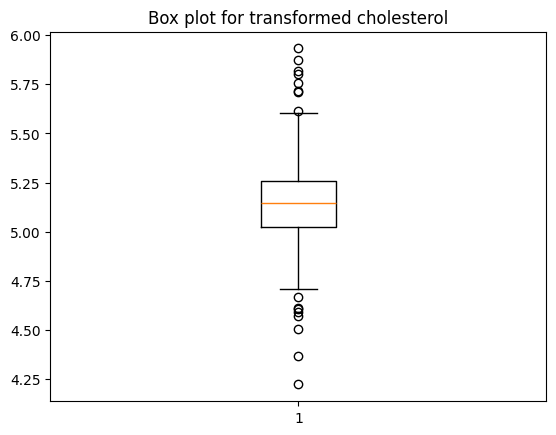

In [132]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

df_boxcox = df.copy()
df_boxcox['cholestoral '] = df_boxcox['cholestoral '].fillna(df_boxcox['cholestoral '].median())

df_boxcox_transformed = df_boxcox.apply(lambda x: boxcox(x + 1)[0] if (x > 0).all() else x)
print("Box-Cox Transformation:\n", df_boxcox_transformed)

#box plot for original data
plt.boxplot(df_boxcox['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for transformed data
plt.boxplot(df_boxcox_transformed['cholestoral '])
plt.title("Box plot for transformed cholesterol")
plt.show()


#### 3. Capping

3-1 Winsorizing 

Limit extreme values by setting them to a specified percentile value (e.g., replacing the top 1% of values with the value at the 99th percentile).

Winsorizing:
      Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63.0  1.0         1.0           145.0         233.0   
1                 37.0  1.0         3.0           130.0         250.0   
2                 41.0  0.0         2.0           130.0         204.0   
3                 56.0  1.0         2.0           120.0         236.0   
4                 57.0  0.0         4.0           120.0         341.0   
..                 ...  ...         ...             ...           ...   
592               52.0  1.0         4.0           140.0         266.0   
593               43.0  1.0         4.0           140.0         288.0   
594               41.0  1.0         4.0           120.0         336.0   
595               44.0  1.0         4.0           135.0         341.0   
596               49.0  1.0         4.0           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    

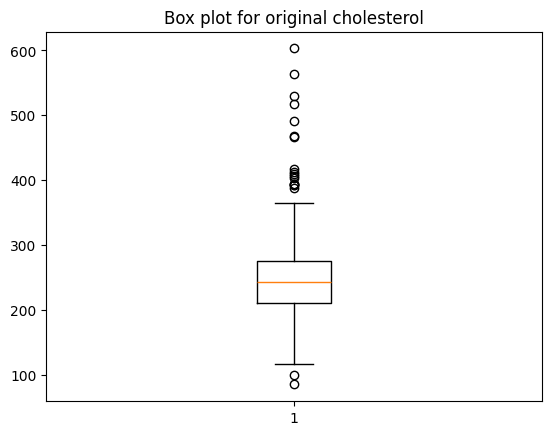

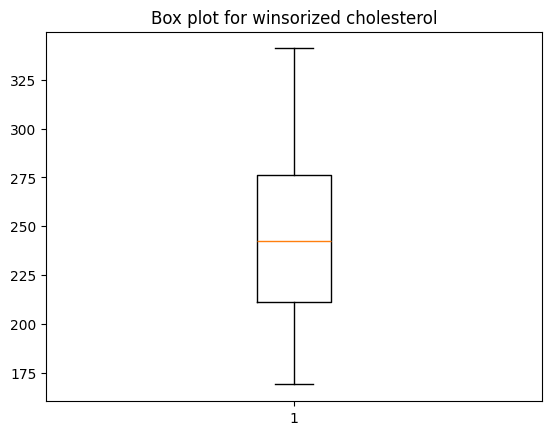

In [133]:
from scipy.stats.mstats import winsorize

df_winsor_method = df.copy()
df_winsor_method['cholestoral '] = df_winsor_method['cholestoral '].fillna(df_winsor_method['cholestoral '].median())

df_winsorized = df_winsor_method.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))
print("Winsorizing:\n", df_winsorized)


#box plot for original data
plt.boxplot(df_winsor_method['cholestoral '])
plt.title("Box plot for original cholesterol")
plt.show()

#box plot for winsorized data
plt.boxplot(df_winsorized['cholestoral '])
plt.title("Box plot for winsorized cholesterol")
plt.show()

#### 4. Imputation


4-1 Mean/Median Imputation

Mean/Median Imputation: Replace outliers with the mean or median value of the data.


In [134]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

df_zscore = df.copy()
df_zscore['cholestoral '] = df_zscore['cholestoral '].fillna(df_zscore['cholestoral '].median())
df_zscore

z_score = np.abs(stats.zscore(df_zscore['cholestoral ']))
threshold = 3

df_zscore_mean_imputed = df.apply(lambda x: x.mask((z_score > threshold) | (z_score < -threshold), x.mean()))

df_zscore_median_imputed = df.apply(lambda x: x.mask((z_score > threshold) | (z_score < -threshold), x.median()))

print("Original Data:\n", df_zscore.shape)
print("Removal using mean_imputed:\n", df_zscore_mean_imputed.shape)
print("Removal using median imputed:\n", df_zscore_median_imputed.shape)


Original Data:
 (597, 14)
Removal using mean_imputed:
 (597, 14)
Removal using median imputed:
 (597, 14)


#### 5. Robust Statistical Methods


5-1 Use of Robust Estimators

Use of Robust Estimators: Employ statistical methods that are less sensitive to outliers, such as the median instead of the mean or robust regression techniques.


In [136]:
from sklearn.linear_model import HuberRegressor
import pandas as pd


df_huber = df.copy()
df_huber = df_huber.fillna(0)

x = df_huber.drop('c', axis=1)
y = df_huber['c']


huber = HuberRegressor().fit(x, y)
res = huber.predict(x)
print("Robust Regression (Huber):\n", res)

Robust Regression (Huber):
 [ 2.21815907e-01  5.83385392e-01 -6.51182934e-02  4.77490094e-02
  4.30560903e-01  5.01018087e-01  2.93218493e-02  1.09587186e-01
  3.53637694e-01  2.72147705e-01  4.53734845e-01  1.53392379e-01
  1.04461204e-01  2.32332673e-01 -2.04465019e-01  2.22694368e-01
  3.06017419e-03  1.85260678e-01  5.00258679e-01  1.21246471e-01
  4.79923931e-01  4.17343902e-01  3.49123639e-01  6.37185222e-01
  2.76202127e-01  1.58269270e-01  3.55026614e-01  3.38966254e-01
  2.15420605e-01  3.92113192e-01  4.83061349e-03  4.17677162e-01
 -5.75414797e-02  4.59938989e-01  3.99484670e-01  4.23737864e-01
  5.29266155e-02  3.17003868e-01  1.28259440e-01  8.80870077e-02
  3.14580765e-01  3.66151212e-02  8.09850160e-01  2.69484098e-01
  1.70377963e-01  6.69014494e-02  1.27793587e-01  1.97001676e-01
  6.84085674e-02  1.23034436e-01  5.93262274e-02  3.65202536e-01
  8.48561352e-01  7.68874959e-02 -9.61702729e-02  2.59675428e-01
  2.10872901e-01  2.30905464e-01 -1.41759854e-01  2.49568445e-

c:\Users\acecr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
